# Chapter 3.3: Maricopa County's Estimated Infections and Rate of Detection

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [3]:
deaths_df = deaths_df[deaths_df['iso3'] == 'USA'] 
deaths_df = deaths_df.reset_index()
deaths_df = deaths_df.drop('index', axis=1)
deaths_df = deaths_df.fillna('0') 
deaths_df.to_csv('US_Deaths.csv', index = False)
deaths_df = deaths_df.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'FIPS', 'Admin2', 'Province_State', 'Population'], axis=1)

In [4]:
cases_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')

In [5]:
cases_df = cases_df[cases_df['iso3'] == 'USA'] 
cases_df = cases_df.reset_index()
cases_df = cases_df.drop('index', axis=1)
cases_df = cases_df.fillna('0') 
cases_df = cases_df.fillna('0') 
cases_df.to_csv('US_Confirmed.csv', index=False)
cases_df = cases_df.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'FIPS', 'Admin2', 'Province_State'], axis=1)

In [6]:
deaths_df_MC = deaths_df.iloc[103,:]
deaths_df_MC = deaths_df_MC.reset_index()

In [7]:
cases_df_MC = cases_df.iloc[103,:]
cases_df_MC = cases_df_MC.reset_index()
index_val = len(cases_df_MC.index)

In [8]:
for ind in deaths_df_MC.index:
    if (int(ind)+18) > index_val-1:
        deaths_df_MC.loc[ind, 'total_infections'] = 0
    else:
        deaths_df_MC.loc[ind, 'total_infections'] = deaths_df_MC.iloc[ind+18, 1] * 100

In [9]:
deaths_df_MC = deaths_df_MC[0:-18]

In [10]:
merged_df_MC = pd.merge(deaths_df_MC, cases_df_MC, on = 'index', suffixes = ['_deaths', '_cases'])

In [11]:
merged_df_MC['detection_rate'] = merged_df_MC['103_cases'] / merged_df_MC['total_infections']

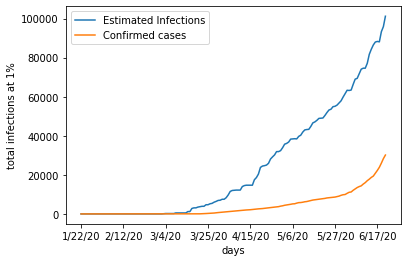

In [12]:
fig, ax = plt.subplots()
ax.plot(merged_df_MC['index'], merged_df_MC['total_infections'], label='Estimated Infections')
ax.plot(merged_df_MC['index'], merged_df_MC['103_cases'], label='Confirmed cases')
ax.set_xlabel('days')
ax.set_ylabel('total infections at 1%')
plt.xticks(np.arange(0, 151, step=21)) 
ax.legend()

This graph displays Maricopa's estimated number of infeections, calculated with death counts and a death rate of 1%, and the the number of confimred cases of COVID 19.

In [13]:
merged_df_MC = merged_df_MC[55:-1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e2a8350>]],
      dtype=object)

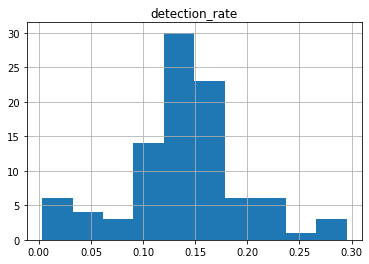

In [14]:
merged_df_MC.hist(column='detection_rate', bins=10)

To determine the average detection rate in Maricopa county, the number of reported cases is divided by it's esetimated counterpart for each date. As displayed in the histogram, Maricopa appears to detect approximately 10-20% of all COVID 19 cases. 